# 과제 : K-means와 DBSCAN 비교


아래 데이터셋을 활용하여 클러스터링을 하려고 합니다.
코드의 빈칸을 채우시고, 주관식 문제에 답해주세요.

## 데이터셋 불러오기 및 시각화

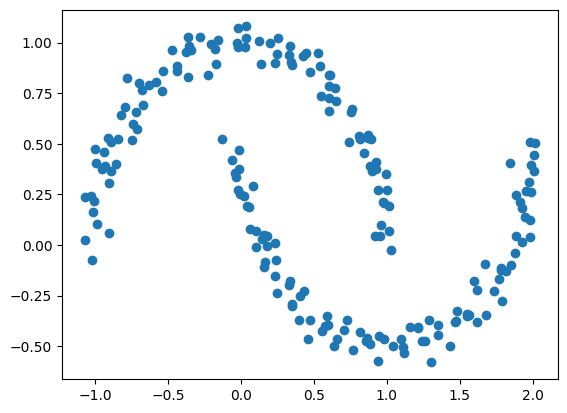

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

x, y = make_moons(n_samples = 200, shuffle = True, noise = 0.05, random_state = 0)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

km = KMeans(n_clusters = 2, random_state = 0)
pred1 = km.fit_predict(x)

## K-means 클러스터링

### Elbow method

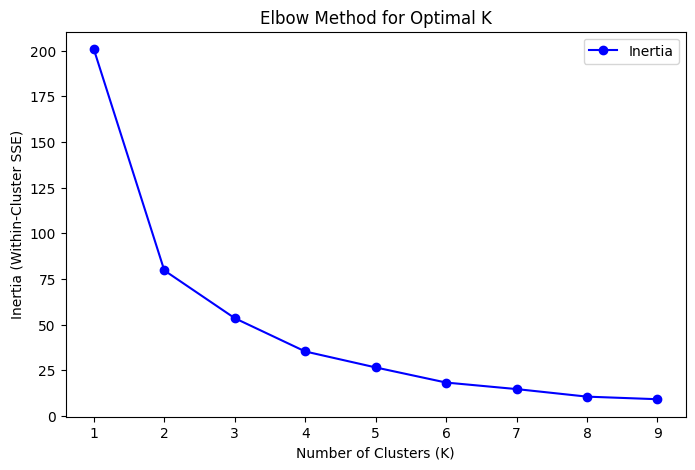

In [2]:
# 엘보우 메소드 시각화
inertia_values = []
silhouette_values = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(x)
    inertia_values.append(km.inertia_)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(K_range, inertia_values, marker='o', linestyle='-', color='blue', label="Inertia")
ax1.set_xlabel("Number of Clusters (K)")
ax1.set_ylabel("Inertia (Within-Cluster SSE)")
ax1.set_title("Elbow Method for Optimal K")
ax1.legend()
plt.show()

### 문제 1
**엘보우 메소드를 바탕으로, 최적의 K값을 설정하여 코드의 빈칸을 채운 후, 판단 근거를 서술하세요.**

In [3]:
# 3️⃣ 최적의 K값 선택 (엘보우 지점)
optimal_k = 2  # 엘보우 메소드에서 꺾이는 지점을 선택

판단 근거: 그래프에서 급격한 감소가 끝나고 완만해지는 지점이 최적의 K값이기 때문에 2가 적합하다.

### 결과

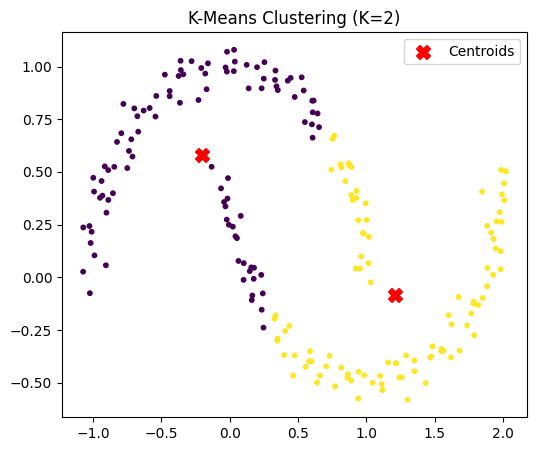

In [5]:
# K-Means 클러스터링 실행
km = KMeans(n_clusters=optimal_k, random_state=0)
pred_kmeans = km.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_kmeans, cmap='viridis', s=10)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.legend()
plt.show()


## DBSACN

### 문제 2
**eps와 min_samlpes의 개념을 이해한 후, 이 둘을 조절하여 실행해보며 아래 사진과 같은 군집을 형성하세요.**

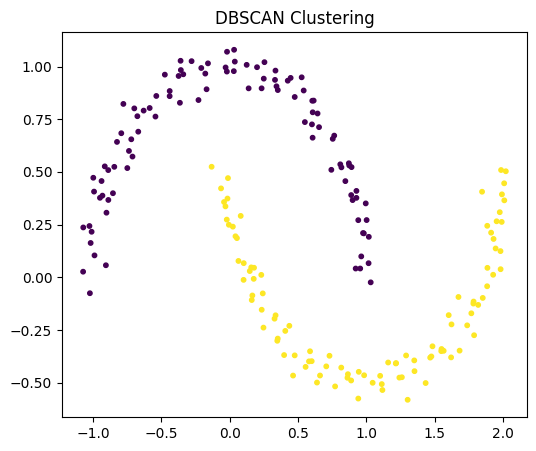

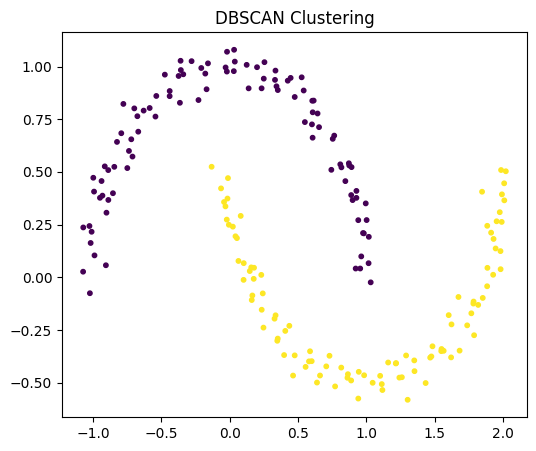

In [ ]:
# DBSCAN 클러스터링 실행
dbscan = DBSCAN(eps= 0.2, min_samples= 5)
pred_dbscan = dbscan.fit_predict(x)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=pred_dbscan, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.show()

### 문제 3
**eps와 min_samples가 너무 크거나 작을 때, 왜 상식적인 군집화가 이루어지지 않았을까요?**

1) eps

eps는 주변 이웃을 탐색하는 반경이다.
eps가 너무 작으면 각 포인트가 너무 좁은 영역에서만 이웃을 찾게 되어 너무 많은 군집이 형성될 수 있다. 또한 대부분의 포인트가 노이즈로 인식될 수도 있다.
eps가 너무 크면 하나의 거대한 클러스터가 형성될 가능성이 높다.모든 데이터 포인트가 같은 군집으로 묶여버려 군집이 세분화되지 않고 의미 있는 분할이 사라진다.

2) min_samples

min_samples는 핵심 포인트로 간주되기 위한 최소 이웃 개수다.
min_samples 값이 너무 작은 경우 거의 모든 데이터 포인트가 핵심 포인트가 되어 군집이 과하게 생성될 수 있다.
min_samples 값이 너무 클 경우 많은 데이터를 포함해야만 핵심 포인트로 인정되기 때문에 군집이 거의 형성되지 않거나 모든 데이터가 노이즈로 간주된다.

### 문제 4
**K-means의 결과와, DBSCAN의 결과가 다른 이유를 특징을 포함하여 서술하세요.**


K-means와 DBSCAN는 클러스터를 형성하는 방식이 다르기 때문에 결과가 다르게 나올 수 밖에 없다.

1) K-means 특징

K-means는 각 군집의 중심을 기준으로 데이터를 분류하는 방식이다.
원형 클러스터를 가정하고 있으며 데이터가 비선형 구조를 가지면 적절한 군집을 형성하지 못한다. K값을 사전에 설정해야 하고 노이즈에 민감하다.

2)  DBSCAN 특징

DBSCAN은 밀도가 높은 영역을 기준으로 클러스터를 형성하는 방식이다.
eps 반경 내 min_samples 이상의 데이터가 있으면 클러스터를 확장한다. 비선형 구조에서도 적절한 군집 형성이 가능하다. K-means와 달리 K 값을 미리 설정할 필요 없다. 노이즈를 효과적으로 감지할 수 있다.